# Stiffness in Initial Value Problems

In [1]:
import numpy as np
import matplotlib.pyplot as pt

Consider $y'=-100y+100t + 101$.

Exact solution: $y(t)=1+t+ce^{-100t}$.

Exact solution derivative: $y'(t)=1-100ce^{-100t}$.

In [2]:
def f(t, y):
    return -100*y+100*t + 101

In [3]:
t_end = 0.2

def plot_solution(t0, y0):
    c = (y0-1-t0)/np.exp(-100*t0)
    t_mesh = np.linspace(t0, t_end, 1000)
    solution = 1+t_mesh+c*np.exp(-100*t_mesh)
    
    pt.plot(t_mesh, solution, label="exact")
    pt.plot(t0, y0, "ko")

/usr/local/lib/python3.5/dist-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python3.5/dist-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


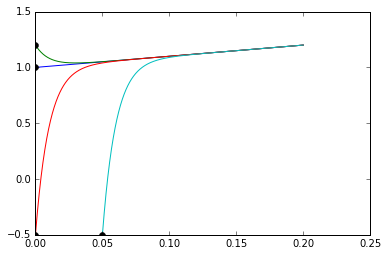

In [4]:
plot_solution(t0=0, y0=1)
plot_solution(t0=0, y0=1.2)
plot_solution(t0=0, y0=-0.5)
plot_solution(t0=0.05, y0=-0.5)

Here's a helper function that uses a time stepper in the form of a `step_function` to numerically solve an ODE and plot the numerical solution:

In [38]:
def integrate_ode(step_function, t0, y0, h):
    times = [t0]
    ys = [y0]

    while times[-1] <= t_end + 1e-14:
        t = times[-1]
        ys.append(step_function(t, ys[-1], h))
        times.append(t + h)

    pt.plot(times, ys, label=step_function.__name__)
    pt.xlim([t0, t_end])
    pt.ylim([-1, 2])
    pt.legend(loc="best")

## Using an Explicit Method

First, implement `forward_euler_step(tk, yk, h)`:

In [44]:
#clear
def forward_euler_step(tk, yk, h):
    return yk + h*f(tk, yk)

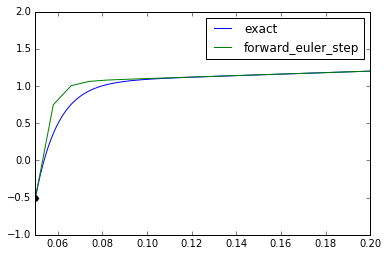

In [45]:
t0 = 0.05
y0 = -0.5
h = 0.008  # start this at 0.001, then grow

plot_solution(t0=t0, y0=y0)
integrate_ode(forward_euler_step, t0=t0, y0=y0, h=h)

* What's the main challenge here?

## Using an Implicit Method

Next, implement `backward_euler_step(tk, yk, h)`:

In [46]:
#clear
def backward_euler_step(tk, yk, h):
    tkp1 = tk+h
    return (yk + h*(100*tkp1 + 101))/(1+100*h)

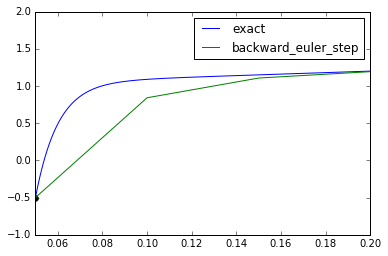

In [48]:
t0 = 0.05
y0 = -0.5
h = 0.05  # start this at 0.001, then grow

plot_solution(t0=t0, y0=y0)
integrate_ode(backward_euler_step, t0=t0, y0=y0, h=h)
pt.xlim([t0, t_end])
pt.ylim([-1, 2])
pt.legend()